In [15]:
import os
import numpy as np
from glob import glob
import matplotlib.pylab as plt
from PIL import Image

In [27]:
x_dir = "/data1/lzy2020/segpc2021/train/x"
y_dir = "/data1/lzy2020/segpc2021/train/y"
yall_dir = "/data1/lzy2020/segpc2021/train/y_all"

In [4]:
x_fileNames = os.listdir(x_dir)
print("image #", len(x_fileNames))
print(x_fileNames[:10])

image # 298
['2363.bmp', '2187.bmp', '201.bmp', '2194.bmp', '9673.bmp', '9809.bmp', '1991.bmp', '9521.bmp', '408.bmp', '9644.bmp']


In [30]:
for filename in x_fileNames:
    img = Image.open(os.path.join(x_dir,filename))
    print(np.asarray(img).shape)

(1536, 2040, 3)
(1536, 2040, 3)
(1920, 2560, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1920, 2560, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1920, 2560, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1920, 2560, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2040, 3)
(1536, 2

In [6]:
y_fileNames = os.listdir(y_dir)
print("mask #", len(y_fileNames))
print(y_fileNames[:10])

mask # 1636
['1862_2.bmp', '9700_10.bmp', '2304_11.bmp', '2104_4.bmp', '1800_4.bmp', '9884_7.bmp', '9673_14.bmp', '9428_3.bmp', '2250_3.bmp', '9656_2.bmp']


In [36]:
img = Image.open("/data1/lzy2020/segpc2021/train/x/106.bmp")
img_array = np.asarray(img)
img_array.shape

(1920, 2560, 3)

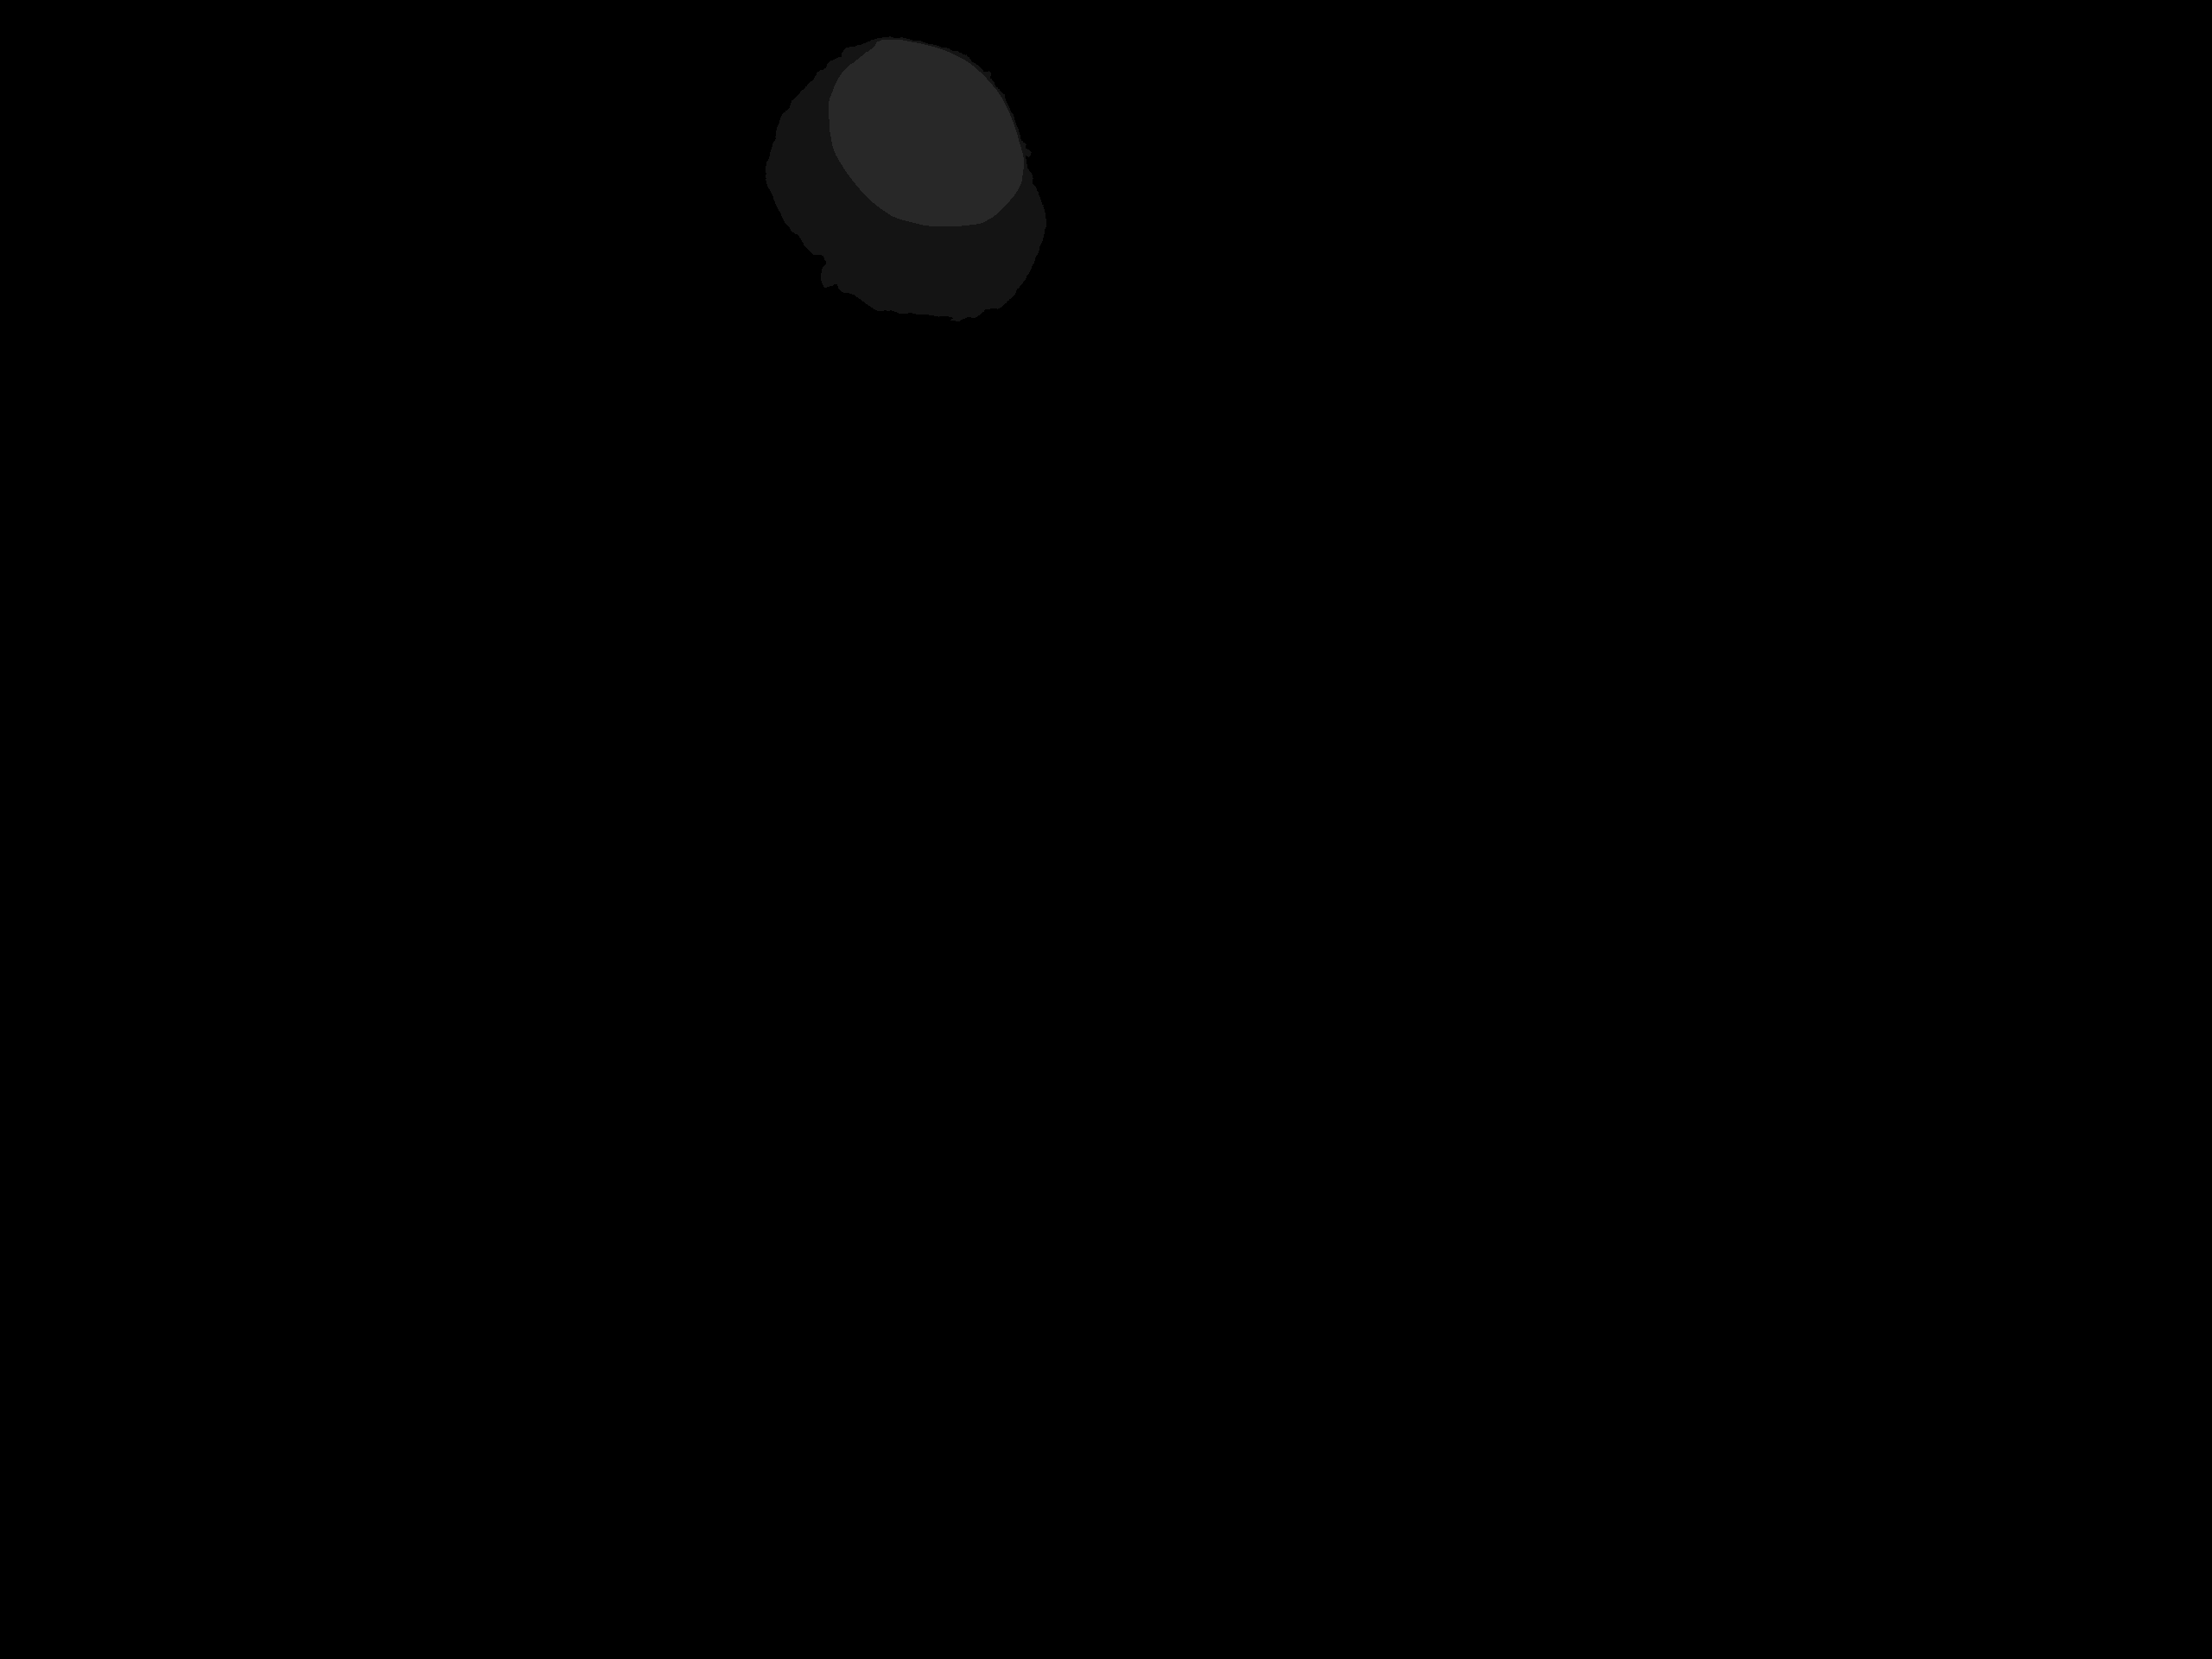

In [10]:
mask = Image.open("/data1/lzy2020/segpc2021/train/y/106_1.bmp")
mask

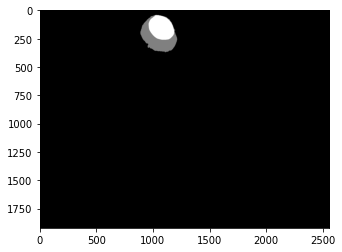

In [25]:
plt.imshow(mask_array,cmap="gray")

In [18]:
mask_array = np.asarray(mask)
mask_array.shape

(1920, 2560)

In [20]:
set(mask_array.flatten())

{0, 20, 40}

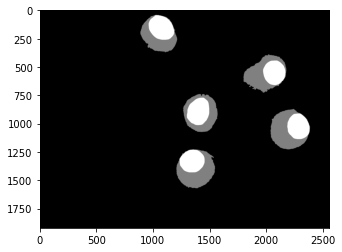

In [24]:
mask_all = np.zeros((1920, 2560))
for path in glob("/data1/lzy2020/segpc2021/train/y/106_*.bmp"):
    mask = Image.open(path)
    mask_all = np.maximum(mask_all, np.asarray(mask))
plt.imshow(mask_all,cmap="gray")

In [33]:
x_fileNames = os.listdir(x_dir)
for filename in x_fileNames:
    shape = np.asarray(Image.open(os.path.join(x_dir, filename))).shape[:2]
    mask_all = np.zeros(shape)
    for path in glob(os.path.join(y_dir, filename)[:-4]+"_*.bmp"):
        mask = Image.open(path)
        mask_all = np.maximum(mask_all, np.asarray(mask))
    to_path = os.path.join(yall_dir, filename[:-4])
    np.save(to_path, mask_all)

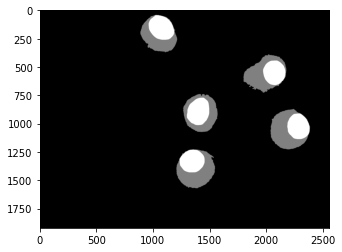

In [35]:
mask_array = np.load("/data1/lzy2020/segpc2021/train/y_all/106.npy")
plt.imshow(mask_array, cmap="gray")